In [1]:
]activate .; instantiate

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In [2]:
using Flux, Flux.Data.MNIST, Images
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated, partition
using Statistics

,,,,,,,,,

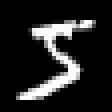
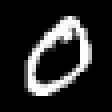
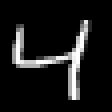
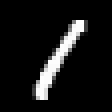
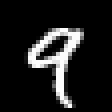
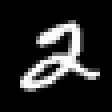
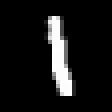
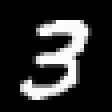
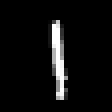
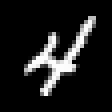

In [3]:
imgs = MNIST.images()

labels = gpu(collect(onehotbatch(MNIST.labels(), 0:9)))

imgs[1:10]

In [4]:
gpu(collect(Flux.onehotbatch(MNIST.labels(), 0:9)))

10×60000 Array{Bool,2}:
 false   true  false  false  false  …  false  false  false  false  false
 false  false  false   true  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false   true  false  false  false
 false  false   true  false  false     false  false  false  false  false
  true  false  false  false  false  …  false  false   true  false  false
 false  false  false  false  false     false  false  false   true  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false      true  false  false  false   true
 false  false  false  false   true     false  false  false  false  false

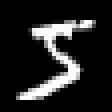

In [5]:
imgs[1]

In [6]:
# Partition into batches of size 1,000
train = [(gpu(hcat(float.(vec.(imgs[i]))...)), labels[:,i])
         for i in partition(1:60_000, 1000)]

# Prepare test set (first 1,000 images)
tX = gpu(hcat(vec.(float.(MNIST.images(:test)[1:1000]))...))
tY = gpu(onehotbatch(MNIST.labels(:test)[1:1000], 0:9));

In [7]:
m = Chain(
  Dense(28^2, 32, relu),
  Dense(32, 10),
  softmax)

m = gpu(m)

loss(x, y) = crossentropy(m(x), y)

loss (generic function with 1 method)

In [8]:
m(tX[:, 1])

Tracked 10-element Array{Float64,1}:
 0.07391696892125167
 0.10995647828415822
 0.10795194519997614
 0.09570939299649496
 0.07203641932664288
 0.16405331999082756
 0.09588985604403494
 0.07515259322926605
 0.11687858847505254
 0.08845443753229516

In [9]:
labels

10×60000 Array{Bool,2}:
 false   true  false  false  false  …  false  false  false  false  false
 false  false  false   true  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false   true  false  false  false
 false  false   true  false  false     false  false  false  false  false
  true  false  false  false  false  …  false  false   true  false  false
 false  false  false  false  false     false  false  false   true  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false      true  false  false  false   true
 false  false  false  false   true     false  false  false  false  false

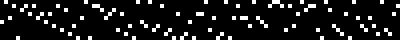

In [10]:
Gray.(collect(labels[:,1:100]))

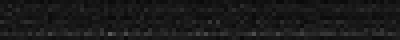

In [11]:
Gray.(collect(m(train[1][1]).data)[:,1:100])

In [12]:
evalcb = () -> display(Gray.(collect(m(train[1][1]).data)[:,1:100]))

#5 (generic function with 1 method)

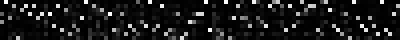

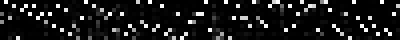

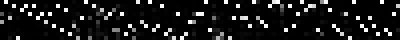

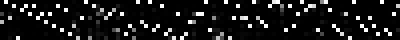

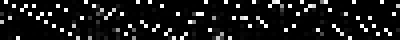

In [13]:
for i = 1:5
    Flux.train!(loss, train, ADAM(params(m)))
    evalcb()
end

Test set accuracy.

In [14]:
mean(onecold(m(tX)) .== onecold(tY))

0.923

In [15]:
m(tX[:, 1])

Tracked 10-element Array{Float64,1}:
 3.4498192777685336e-5 
 7.725503333009007e-7  
 0.00017293197926347971
 0.0006828804376187306 
 7.884372090490629e-7  
 3.282174474704636e-5  
 1.6588802303797134e-7 
 0.9978566196500939    
 0.00011408076887279359
 0.0011044403510609303 

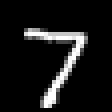

In [16]:
MNIST.images(:test)[1]

In [17]:
onecold(m(tX[:, 1]))

8